In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import run
import igraph as ig

In [3]:
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

In [4]:
g = ig.Graph.Erdos_Renyi(50, m=500)
g.summary()

'IGRAPH U--- 50 500 -- '

In [10]:
bc, bu = run.get_behaviors(3)

In [11]:
bc

{0: 0.8407305695299995, 1: 0.3509271270586677, 2: 0.3178287570396524}

In [12]:
g = run.initialize_graph(g, 2, 2)

In [13]:
g.summary()

'IGRAPH U--- 50 500 -- \n+ attr: behaviors (v), num_post (v), num_read (v), r (v), theta (v)'

In [15]:
g = run.alter_structure(g, 0.1)

In [16]:
g.summary()

'IGRAPH U--- 50 550 -- \n+ attr: behaviors (v), num_post (v), num_read (v), r (v), theta (v)'

In [17]:
run.compute_resource_utilization(g,bc)

0.0

In [212]:
g = ig.Graph.Watts_Strogatz(1, 400, 4, 0.2)
# g = ig.Graph.Erdos_Renyi(200, 0.1)
graphs = [g]
for _ in range(10):
    g = run.alter_structure(g,0.1)
    graphs.append(g.copy())

In [213]:
seeds = np.random.choice(g.vs.indices,size=20)

In [214]:
b_vals = []
for graph in graphs:
    b = np.mean([run.run(graph, 2, 5, seeds=seeds)[0] for _ in range(3)])
    b_vals.append(b)

In [215]:
b_vals

[0.38885507018458343,
 0.47471794814510176,
 0.27661626111853088,
 0.36827802451636832,
 0.36613164923737823,
 0.36831213091354448,
 0.59183281189129744,
 0.12115596861913232,
 0.33278209632657374,
 0.25088274699342894,
 0.30214399630961003]

In [216]:
c = np.power([1.05], range(len(b_vals)))

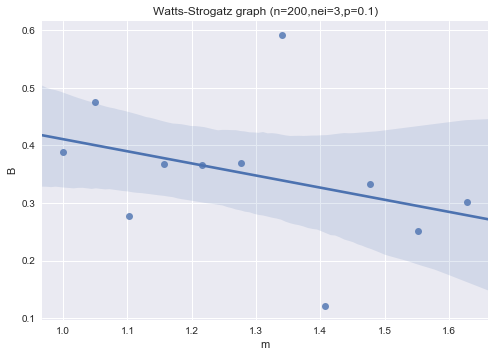

In [218]:
ax = sns.regplot(c, np.array(b_vals))
ax.set_title('Watts-Strogatz graph (n=200,nei=3,p=0.1)')
ax.set_ylabel('B')
ax.set_xlabel('m')
plt.savefig('ws_bc.pdf')

In [143]:
import seaborn as sns

In [223]:
g = ig.Graph.Watts_Strogatz(1,200,4,0.2)
runs = 10
bvals = []
for _ in range(runs):yeah
    B = np.mean([run.run(g, 2, 5, num_behaviors=runs+1, seeds=seeds)[0] for _ in range(5)])
    bvals.append(B)
    print (B)

0.431625731989
0.448490332026
0.439947829805
0.439060294698
0.580114218772
0.318261094483
0.491395054467
0.344842781425
0.461357736147
0.343185939087


In [206]:
range(1,runs+1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

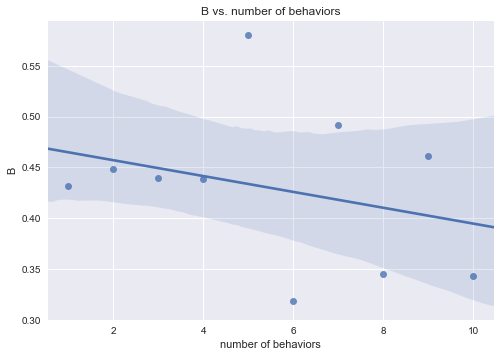

In [224]:
ax = sns.regplot(np.array(range(1,runs+1)), np.array(bvals))
ax.set_xlabel('number of behaviors')
ax.set_ylabel('B')
ax.set_title('B vs. number of behaviors')
plt.savefig('numb.pdf')

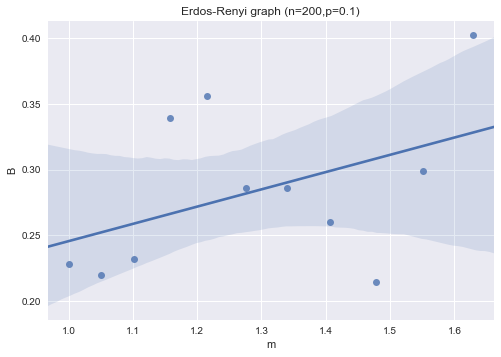

In [177]:
ax = sns.regplot(c, np.array(b_vals))
ax.set_title('Erdos-Renyi graph (n=200,p=0.1)')
ax.set_ylabel('B')
ax.set_xlabel('m')
plt.savefig('er_bc.pdf')